In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

# 1. Загрузите файл HR.csv в pandas dataframe

In [57]:
df = pd.read_csv('HR.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isna().mean() *100

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

# 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)

In [ ]:
df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
print('Уровень удовлетворенности работой -', df['satisfaction_level'].median())
print('Время с момента последней оценки в годах -', df['last_evaluation'].median())
print('оличество проектов, выполненных за время работы -', df['number_project'].median())
print('Среднее количество часов на рабочем месте в месяц -', df['average_montly_hours'].median())
print('Стаж работы в компании в годах -', df['time_spend_company'].median())

Уровень удовлетворенности работой - 0.64
Время с момента последней оценки в годах - 0.72
оличество проектов, выполненных за время работы - 4.0
Среднее количество часов на рабочем месте в месяц - 200.0
Стаж работы в компании в годах - 3.0


In [ ]:
print('Heсчастные случаи на рабочем месте -', df['Work_accident'].mode()[0])
print('Уволился ли сотрудник -', df['left'].mode()[0])
print('Повышался ли сотрудник за последние пять лет -', df['promotion_last_5years'].mode()[0])
print('Отдел в котором работает сотрудник -', df['department'].mode()[0])
print('Относительный уровень зарплаты -', df['salary'].mode()[0])


Heсчастные случаи на рабочем месте - 0
Уволился ли сотрудник - 0
Повышался ли сотрудник за последние пять лет - 0
Отдел в котором работает сотрудник - sales
Относительный уровень зарплаты - low


# 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

<Axes: >

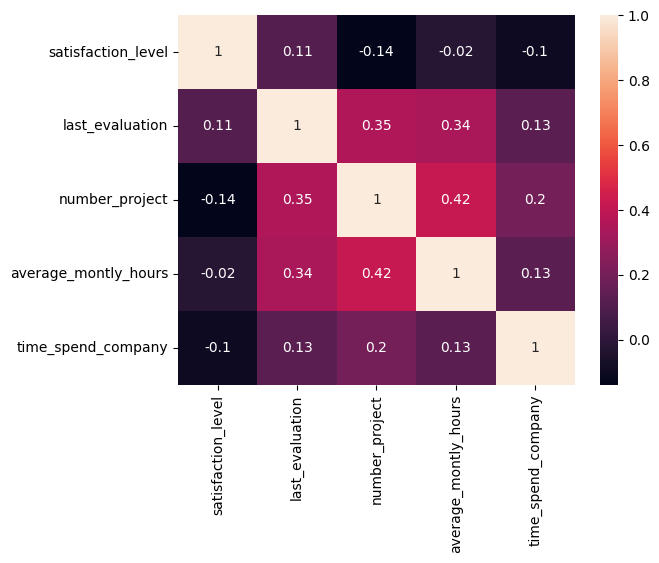

In [ ]:
_df = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']]

corr = _df.corr().round(2)
sns.heatmap(corr, annot = True)

Итог:

Больше всего коррелируют *average_montly_hours* и *number_project*  
0.42

меньше всех *number_project* и *satisfaction_level*

-0.14

# 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [37]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [56]:
df1 = df[['left', 'department']]
df1 = df1[df1['left'] == 0].groupby(['department']).count()
df1.rename(columns = {'left': 'count'}, inplace=True)
df1

,count
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


# 5. Показать распределение сотрудников по зарплатам

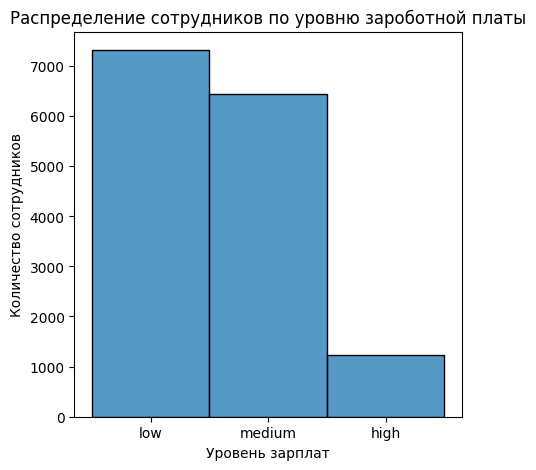

In [ ]:
plt.figure(figsize=[5, 5])
sns.histplot(data=df, x='salary', bins=3)
plt.title('Распределение сотрудников по уровню зароботной платы')
plt.ylabel('Количество сотрудников')
plt.xlabel('Уровень зарплат')
plt.show()

# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
fig = px.histogram(df, x = 'department', color = 'salary', barmode = 'group', text_auto = True)
fig.update_layout(xaxis_title_text ='Департамент', yaxis_title='Количество сотрудников', title = 'Pаспределение сотрудников по зарплатам в каждом департаменте')

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

создаем таблицу с нужными данными для анализа

In [ ]:
df2 = df[['average_montly_hours', 'salary']].groupby(by='salary').sum()
df2.head()

,average_montly_hours
salary,
high,247236
low,1470491
medium,1297827


построим граффик по нашей выборки

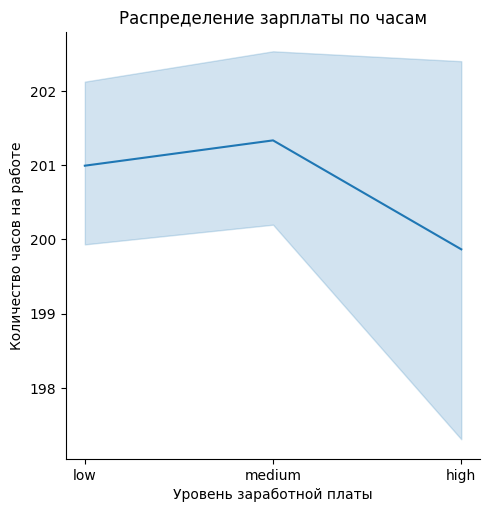

In [ ]:
sns.relplot(df2, x=df['salary'], y=df['average_montly_hours'], kind = "line")
plt.title('Распределение зарплаты по часам')
plt.ylabel('Количество часов на работе')
plt.xlabel('Уровень заработной платы')
plt.show()


На графике заметно, что сотрудники с высокой зарплатой проводят меньше времени на работе, чем их коллеги

# 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности)

Подготовка данных для анализа

In [ ]:
df3 = df[['left', 'promotion_last_5years', 'satisfaction_level', 'number_project']]
df3['promotion_last_5years'] = df3['promotion_last_5years'].replace({1: 'Да', 0 : 'Нет'})
df_left = df3[df3['left'] == 1].reset_index(drop = True)
df_stay = df3[df3['left'] == 0].reset_index(drop = True)

*Доля сотрудников с повышением за последние 5 лет*

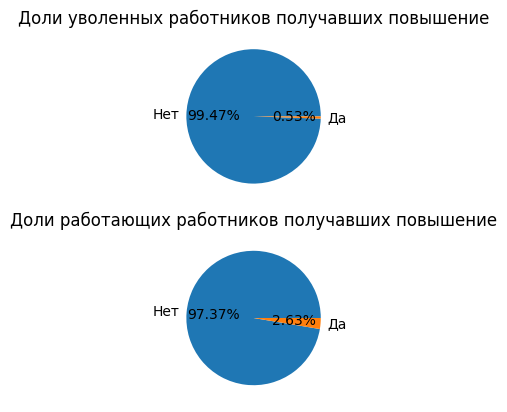

In [113]:
plt.subplot (2, 1, 1)
income = df_left['promotion_last_5years'].value_counts()
colors = sns.color_palette()
plt.pie(income, labels=income.index, colors=colors, autopct='%.2f%%')
plt.title('Доли уволенных работников получавших повышение')

plt.subplot (2, 1, 2)
income = df_stay['promotion_last_5years'].value_counts()
colors = sns.color_palette()
plt.pie(income, labels=income.index, colors=colors, autopct='%.2f%%')
plt.title('Доли действующих работников получавших повышение')

plt.show()

*Средняя степень удовлетворенности*

In [139]:
left = df_left["satisfaction_level"].mean().round(2)
stay = df_stay["satisfaction_level"].mean().round(2)
print(f'Средняя степень удовлетворенности среди уволенных работников - {left * 100}%')
print(f'Средняя степень удовлетворенности среди действующих работников - {stay * 100}%')

Средняя степень удовлетворенности среди уволенных работников - 44.0%
Средняя степень удовлетворенности среди действующих работников - 67.0%


*Среднее количество проектов*

In [141]:
left = df_left["number_project"].mean().round(2)
stay = df_stay["number_project"].mean().round(2)
print(f'Среднее количество проектов среди уволенных работников - {left}')
print(f'Среднее количество проектов среди действующих работников - {stay}')

Средняя степень удовлетворенности среди уволенных работников - 3.86
Средняя степень удовлетворенности среди действующих работников - 3.79
